In [1]:
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np


# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴더
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

# **Chapter 07. Ensemble Learning and Random Forests**






무작위로 선택된 수천 명의 사람에게 복잡한 질문을 하고 대답을 모으면 많은 경우 전문가의 답보다 이렇게 모은 답이 낫습니다. 

이를 **대중의 지혜(wisdom of crowd)** 라고 합니다.



이와 비슷하게 일련의 예측기로부터 예측을 수집하면 가장 좋은 모델 하나보다 더 좋은 예측을 얻을 수 있습니다. 

일련의 예측기를 **앙상블(ensemble)** 이라고 부릅니다. 


Decision tree의 ensemble을 **Random Forest**라고 합니다. 

---

## **7.1 Voting Classifiers** 


![a](https://user-images.githubusercontent.com/39263586/64158801-18da5200-ce74-11e9-954c-01a29e1b335c.JPG)


정확도가 80%인 classifier 여러 개를 훈련시켰다고 가정하면 아마도 Logistic Regreesion, SVM, Random Forest 등이 있을 것입니다.

더 좋은 classifier를 만드는 매우 간단한 방법은 각 classifier의 예층을 모아서 가장 많이 선택된 클래스를 예측하는 것입니다.


이렇게 다수결 투표로 정해지는 분류기를 ***직접 투표(hard voting)*** classifier 라고 합니다.

![b](https://user-images.githubusercontent.com/39263586/64159111-a0c05c00-ce74-11e9-8c6e-3613f69e069f.JPG)


다수결 투표 classifier가 ensemble에 포함된 개별 classifier 중 가장 뛰어난 것보다도 정확도가 높을 경우가 많습니다.


각 classifier가 **약한 학습기(weak learner)** 일지라도 충분하게 많고 다양하다면 ensemble은 **강한 학습기(strong learner)** 가 될 수 있습니다.

---

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)


In [3]:
X.min(axis=0)

array([-1.74085223, -1.24634761])

In [4]:
X.max(axis=0)

array([2.79899835, 1.7659488 ])

In [5]:
X.mean(axis=0)

array([0.52721756, 0.25804988])

In [6]:
len(y[y==1])

250

In [7]:
y.shape

(500,)

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver='liblinear', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma='auto', random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gin...
                                        

In [9]:

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


투표 기반 classifier가 다른 개별 classifier보다 성능이 조금 더 높습니다. 


개별 classifier가 클래스의 확률을 예측할 수 있으며, 개별 classifier의 예측을 평균내어 확률이 가장 높은 클래스를 예측할 수 있습니다. 이를 **간접 투표(soft voting)** 이라고 합니다/


In [10]:
log_clf = LogisticRegression(solver='liblinear', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma='auto', probability=True, random_state=42)


##soft voting으로 바꿔줌줌
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gin...
                                        

In [11]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


soft voting의 경우 확률이 높은 투표에 비중을 더 두기 때문에 직접 투표 방식(hard voting)보다 성능이 높습니다. 

---

---

## **7.2 Bagging and Pasting**

앞선 내용과 다른 방법으로는 같은 알고리즘을 사용하지만 training set의 subset을 무작위로 구성하여 classifier를 각기 다르게 학습시키는 것입니다. 

training set에서 중복을 허용하여 샘플링하는 방식을 **배깅(bagging)(bootstrap aggregating의 줄임말)** 이라 하며, 
중복을 허용하지 않고 샘플링하는 방식을 **페이스팅(pasting)** 이라고 합니다.




bagging과 pasting에서는 같은 train sample을 여러 개의 예측기에 걸쳐 사용할 수 있습니다.

bagging만이 한 예측기를 위해 같은 train sample을 여러번 샘플링할 수 있습니다.

![e](https://user-images.githubusercontent.com/39263586/64196092-05ec6f80-cebe-11e9-8142-940e56181db8.JPG)


cf) 참고 자료


![bagging](https://user-images.githubusercontent.com/39263586/64312504-32e67280-cfe3-11e9-83e4-a8f7fd777499.png)


전체 Data set 에서 동일한 크기의 random sampling 된 sub sample set을 만든다. 

생성된 sub sample set 마다 각각 학습모델을 만들어 준다. 이때 각 모델은 서로 다른 알고리즘을 적용 할 수도 있다.



각 서브모델에서 생성된 모델을 이용 하여 최종 모델을 생성하는데, 이때 최종 결과값을 도출 하는 방법은 

Sequencial 일 경우 평균값을, classifier 일때는 투표를 통해 최종 결과를 낼 수 있다.



### scikit-learn의 bagging과 pasting


In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# decision tree classifier 500개 ensemble 훈련시키고 
# training set 중복을 허용하여 무작위로 선택된 100개의 sample로 훈련련
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500,max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [14]:
## decision tree 하나의 예측측

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


Ensemble의 predict이 Decision tree 하나의 predict보다 일반화가 훨씬 잘 된다.

In [15]:
y_pred_tree = tree_clf.predict(X_train)
print(accuracy_score(y_train, y_pred_tree))

1.0


In [16]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

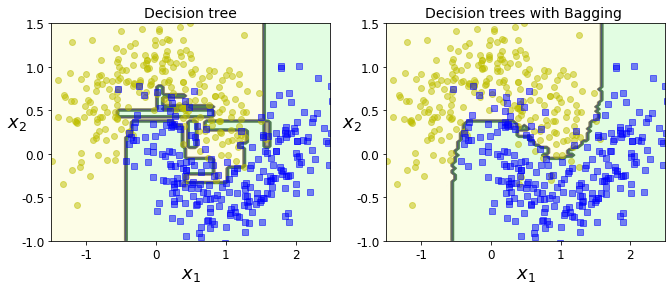

In [17]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision trees with Bagging ", fontsize=14)
plt.show()

### Out-of-Bag Evaluation


Bagging을 사용하면 어떤 샘플은 한 predictor를 위해 여러 번 샘플링되고 어떤 것은 전혀 선택되지 않을 수 있습니다.

BaggingClassifier는 기본값으로 중복을 허용하여(Bootstrap=True) training set 크기 만큼 m개 샘플을 선택합니다. 

####
 

이는 평균적으로 각 Predictor에 training sample의 63%정도만 sampling된다는 것을 의미합니다.


#######################################################################################

선택되지 않은 taining sample의 나머지 37%를 **Out-of-Bag sample**이라고 부릅니다.


 Ensemble의 성능평가는 OOB(Out-Of-Bag) 수치로 파악합니다.





In [18]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9013333333333333

In [19]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

oob 샘플에 대한 decision function의 값도 oob_decision_function_에서 확인할 수 있습니다.

이 경우 decision function는 각 train sample class 확률을 반환합니다. 

다음 예를 보면 첫 번째 train sample이 양성 class에 속할 확률을 68.25%로 추정하고 있습니다.

In [20]:
bag_clf.oob_decision_function_

array([[0.31746032, 0.68253968],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.08379888, 0.91620112],
       [0.31693989, 0.68306011],
       [0.02923977, 0.97076023],
       [0.97687861, 0.02312139],
       [0.97765363, 0.02234637],
       [0.74404762, 0.25595238],
       [0.        , 1.        ],
       [0.71195652, 0.28804348],
       [0.83957219, 0.16042781],
       [0.97777778, 0.02222222],
       [0.0625    , 0.9375    ],
       [0.        , 1.        ],
       [0.97297297, 0.02702703],
       [0.95238095, 0.04761905],
       [1.        , 0.        ],
       [0.01704545, 0.98295455],
       [0.38947368, 0.61052632],
       [0.88700565, 0.11299435],
       [1.        , 0.        ],
       [0.96685083, 0.03314917],
       [0.        , 1.        ],
       [0.99428571, 0.00571429],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.64804469, 0.35195531],
       [0.

---

## **7.3 Random Patches and Random Subspaces**


작동방식은 max_features와 bootstrap_features 동일하지만, 샘플이 아니고 feature에 대한 샘플링 입니다.

고차원의 dataset을 다룰때 매우 유용합니다.

train feature과 sample을 모두 샘플링하는 것을 **Random Patchs method**라고 합니다.


train sample을 모두 사용하고(즉, bootstrap =False , max_samples = 1.0) 특성은 샘플링하는 (bootstrap_features = True, max_samples는 1보다 작은) 것을 

**Random Subspaces method**라고 합니다. 



---

## **7.4 Random Forests**

Random Forest는 앞서 말한 Bagging(또는 Pasting)을 적용한 Decision tree의 Ensemble입니다.




In [21]:
from sklearn.ensemble import RandomForestClassifier
#최대 16개의 leaf_node를 가지는 500개의 Decision Tree로 이루어진 Random Forest classifier 입니다.
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

Random Forest에는 몇가지 예외가 있지만, Decision Tree의 hyperparameter와 Ensemble 자체를 제어하는 BaggingClassifier의 hyperparameter를 모두 가지고 있습니다.


In [22]:
bag_clf = BaggingClassifier( DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

### 7.4.1 Extra-Trees

Random Forest에서 Tree를 만들 때 각 노드는 무작위로 feature subset을 만들어 분할에 사용됩니다.

Tree를 더욱 무작위하게 만들기 위해, 최적의 임계값을 찾는 대신 각 feature의 무작위 임계값값을 사용해 무작위로 분할한 다음 그 중에서 최상의 분할을 선택합니다. 

이와 같이 극단적으로 무작위한 Tree의 Random Forest를 **Extremely Randomized Tree** Ensemble 이라고 부릅니다. 줄여서 Extra-Trees라고 부릅니다. 


### 7.4.2  Feature Importance

Random Forest의 또 다른 장접은 feature의 상대적 중요도를 측정하기 쉽다는 것입니다.


scikit-learn은 어떤 feature를 사용한 노드가 평균적으로 불순도를 얼마나 감소시키는지 확인하여 feature의 중요도를 측정합니다.

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09904503023511269
sepal width (cm) 0.020384240464390652
petal length (cm) 0.4318744899700101
petal width (cm) 0.4486962393304866


In [24]:
rnd_clf.feature_importances_

array([0.09904503, 0.02038424, 0.43187449, 0.44869624])

---

---

---

---

---

---

---

---

## **7.5 Boosting**

Boosting은 weak learners을 여러 개 연결하여 strong learner을 만드는 Ensemble method 입니다.


Boosting method의 아이디어는 앞의 모델을 보완해나가면서 일련의 predictor를 학습시키는 것입니다.

---

cf) 참고


![bb3](https://user-images.githubusercontent.com/39263586/64312833-97ee9800-cfe4-11e9-8630-a1f0e03ab8e6.png)



Boosting도 Bagging과 동일하게 복원 랜덤 샘플링을 하지만, 가중치를 부여한다는 차이점이 있습니다. 

Bagging이 병렬로 학습하는 반면, Boosting은 순차적으로 학습시킵니다. 학습이 끝나면 나온 결과에 따라 가중치가 재분배됩니다.




오답에 대해 높은 가중치를 부여하고, 정답에 대해 낮은 가중치를 부여하기 때문에 오답에 더욱 집중할 수 있게 되는 것 입니다.

Boosting 기법의 경우, 정확도가 높게 나타납니다. 하지만, 그만큼 Outlier에 취약하기도 합니다.

---

### **7.5.1 AdaBoost**

AdaBoost는 Adaptive Boosting의 줄임말 입니다. 

이전 predictor를 보완하는 새로운 predictor를 만드는 방법은 이전 모델이 underfitted 된 train sample의 가중치를 높이는 것입니다.


![j](https://user-images.githubusercontent.com/39263586/64223557-6ce64480-cf0f-11e9-854e-9c56c6e774fc.JPG)


Adaboost classifier를 만들려면 기반이 되는 첫 번째 classifier를 train set에서 훈련시키고 prediction을 만듭니다.



그 다음 잘못 분류된 train smaple에 가중치를 상대적으로 높입니다. 


두 번쨰 classifier는 업데이트된 가중치를 사용해 train set에서 훈련하고 다시 prediction을 만듭니다. 

이 과정을 반복하게 됩니다. 

In [25]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200, learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

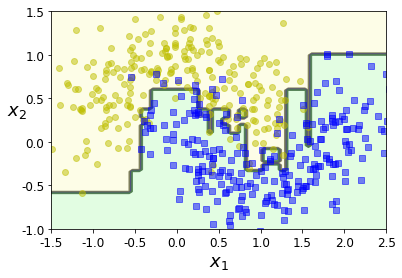

In [26]:
plot_decision_boundary(ada_clf, X, y)

moons dataset에 훈련시킨 5개의 연속된 predictor의 decision boundary 입니다.


첫 번째 classifier가 많은 샘플을 잘못 분류해서 이 샘플들의 가중치가 높아졌습니다. 

두 번째 classifier는 더 정확히 예측하게 됩니다. 


오른쪽 그래프는 학습률을 반으로 낮춘 일련의 predictor 입니다. 


Gradient descent은 cost function을 최소화 하기 위해 한 predictor의 parameter을 조정해가는 반면에, 

Adaboost는 점차 더 좋아지기 위해 Ensemble에 predictor을 추가합니다. 


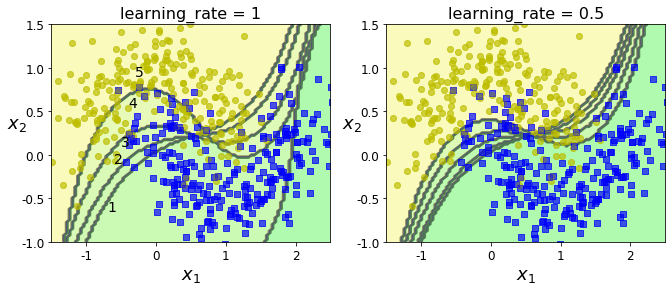

In [27]:

m = len(X_train)

plt.figure(figsize=(11, 4))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    if subplot == 121:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)        
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma='auto', random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)

plt.show()

### **7.5.2 Gradient Boosting**

인기가 있는 또 다른 부스팅 알고리즘은 Gradient boosting 입니다. 


Adaboost처럼 반복마다 샘플의 가중치를 수정하는 대신 이전 predictor가 만든 **잔여 오차(Residual error)** 에 새로운 predictor를 학습시킵니다.


Decision Tree를 기반 predictor로 사용하여 Regression 문제를 풀어보겠습니다.

이를 Gradient Tree Boosting 또는 Gradient Boosted Regression Tree(GBRT)라고 합니다.




먼저 DecisionTreeRegressor를 train set에 학습을 시킵니다.

In [28]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [29]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

첫 번째 predictor(DecisionTreeRegressor)에서 생긴 residual error에 두번째  DecisionTreeRegressor를 훈련시킵니다. 

In [30]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2) 

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

그런 다음 두번째 predictor(DecisionTreeRegressor)에서 생긴 residual error에 세번째 DecisionTreeRegressor를 훈련시킵니다. 

In [31]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [32]:
X_new = np.array([[0.8]])

이제 세 개의 tree를 포함하는 Ensemble 모델을 생겼습니다. 새로운 샘플에 대한 prediction을 만들려면 모든 tree의 prediction을 더하면 됩니다.

In [33]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

밑의 그래프에서 왼쪽 columns는 세 트리의 prediction이고 오른쪽 columns은 Ensemble prediction입니다. 

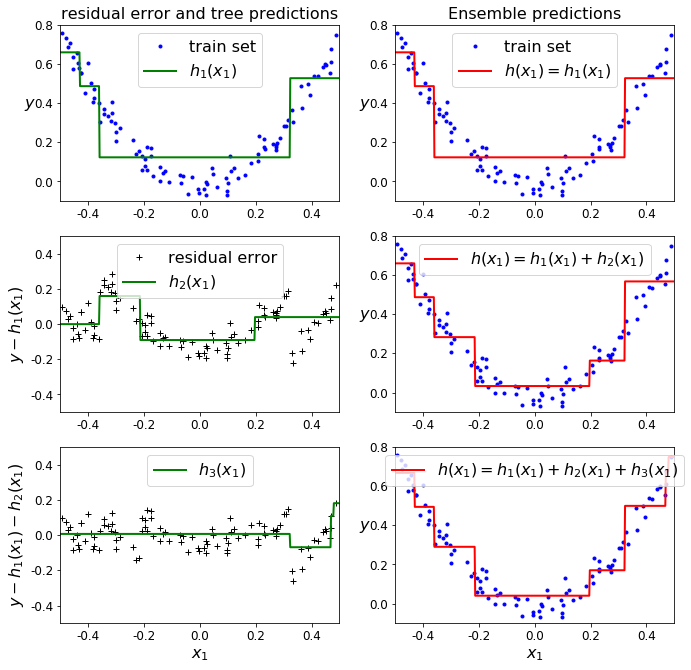

In [34]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="train set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("residual error and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="train set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="residual error")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)


plt.show()

learing_rate가  각 tree의 기여 정도를 조절합니다.


0.1 처럼 낮게 설정할 경우 Ensemble을 train set에 학습시키기 위해 많은 Tree가 필요하지만 일반적으로 예측의 성능은 좋아집니다.

이는 **Shirinkage**라고 부르는 규제 방법입니다. 


아래 그래프에서는 왼쪽 그래프는 Tree가 충분하지 않은 반면 오른쪽 그래프는 Tree가 너무 많아 train set에 overfitting 되었습니다.

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.1, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

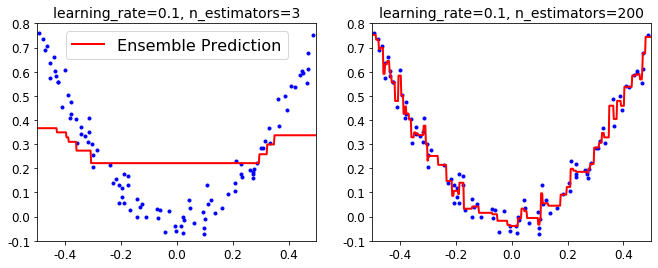

In [37]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble Prediction")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)


plt.show()

최적의 Tree 수를 찾기 위해 조기 종료 기법을 사용할 수 있습니다.



왼쪽 그래프는 Validation error이며 오른쪽은 Best model prediction입니다.

In [38]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=55,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
errors

[0.03976434066090687,
 0.03301153878946109,
 0.027663386192027795,
 0.023337263188229852,
 0.020390590545872743,
 0.017820174421765502,
 0.015262814214454865,
 0.013228529533567415,
 0.011758450328306618,
 0.010288335529306629,
 0.009391268210618017,
 0.008605826199167754,
 0.007745553291052828,
 0.007083571270654957,
 0.006766296135021012,
 0.006116142333014483,
 0.005770219779341232,
 0.005416351332327169,
 0.0050727394710244665,
 0.0048159263120028765,
 0.004357591913537005,
 0.004192866645244622,
 0.0039670672414243964,
 0.0038463154458755833,
 0.0037468374981679863,
 0.003530909744387239,
 0.0034677533859285626,
 0.0033882676886440523,
 0.003224220772589744,
 0.0031883136637545035,
 0.003166151135979498,
 0.003072276914292378,
 0.003024919266015998,
 0.002991089248190895,
 0.002957301355498197,
 0.0028890741785044197,
 0.0028849656803361795,
 0.0028902935070124736,
 0.002836717946434534,
 0.0028151139950619727,
 0.002805906789900023,
 0.002769821491376303,
 0.002775136129921357,
 

In [40]:
min_error = np.min(errors)

In [41]:
min_error

0.002712853325235463

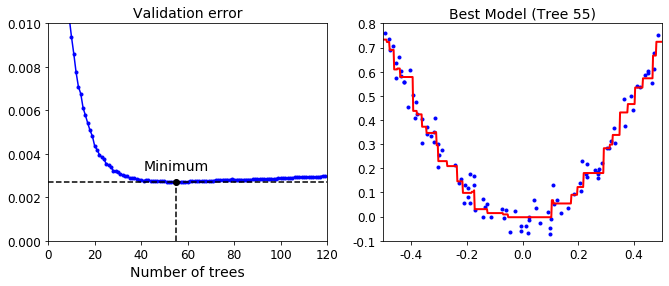

In [42]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best Model (Tree %d)" % bst_n_estimators, fontsize=14)



plt.show()

---

## **7.6 Stacking**

마지막 Ensemble model은 **stacking(stacked generalization의 줄임말)** 입니다.


Ensemble에 속하는 모든 predictor의 prediction을 취합하는 간단한 함수(hard voting 같은)를 사용하는 대신 취합하는 모델을 훈련시킬 수 없을까?라는 기본 아이디어로 출발했습니다. 



밑의 그림에서는 새로운 sample에 Regression 작업을 수행하는 Ensemble을 보여주고 있습니다.


아래의 세 predict은 각각 다른 값 (3.1, 2.7, 2.9)을 예측하고 마지막 predict(**blender** 또는 **meta learner**라고 합니다)가 이 prediction을 입력으로 받아 최종 prediction인 3.0을 만듭니다.



![1q1q1q1q](https://user-images.githubusercontent.com/39263586/64232506-096b0f80-cf2d-11e9-84b8-0b596588354a.JPG)


blender를 학습시키는 일반적인 방법은 hold-out set을 사용하는 것입니다. 

먼저 training set을 2개의 subset으로 나눕니다. 


첫 번째 subset은 첫 번쨰 layer의 predict을 훈련시키기 위해 사용됩니다. 

![13w1wqe1w](https://user-images.githubusercontent.com/39263586/64232574-2a336500-cf2d-11e9-8a08-42a037de1054.JPG)


그런 다음 첫 번째 layer의 predictor를 사용해 두 번쨰 (hold-out)set애 대한 predict을 만듭니다.

이제 hold-out set의 각 sample에 대한 세개의 predictions이 만들어 집니다. 


blender가 새로운 training set로 훈련됩니다.
(즉, 첫 번째 layer의 predict을 가지고 target값을 예측하도록 학습됩니다.

![ef22ddfsda2e](https://user-images.githubusercontent.com/39263586/64232651-4fc06e80-cf2d-11e9-836b-beec71da78a5.JPG)


다음으로 blender 만의 layer(layer2)가 만들어지게 됩니다.

이렇게 하려면 training set를 3개의 subset으로 나눕니다.


첫 번째 set은 첫 번째 layer를 훈련시키는 데 사용되고 두 번째 set는(첫 번째 layer의 predictor로) 2 번째 layer를 훈련시키기 위한 training set을 만드는데 사용됩니다.


세 번째 set은 (두 번째 layer의 predictor로) 세 번째 layer를 훈련시키기 위한 training set를 만드는데 사용됩니다. 



작업이 끝나면 밑의 그림처럼 각 layer를 차례대로 실행해서 새로운 sample에 대한 prediction을 만들 수 있습니다.

![123456](https://user-images.githubusercontent.com/39263586/64232662-57801300-cf2d-11e9-9859-6155e8a5dcd5.JPG)


Scikit-learn에서는 stacking을 지원하지 않습니다.